<a href="https://colab.research.google.com/github/akhil7philip/School_Expenditure_in_UP/blob/main/Assignment_CivicDataLab_Akhil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Background

Annual Financial Statements (Budgets) of union, state, and local governments give the public a sneak peek at the intended expenditure for the upcoming financial year as well as the actual expenditure incurred in the previous financial year. These details are available in an aggregated form at the level of major, sub-major, and minor accounting heads. Most of the states publish them in PDF formats, restricting any meaningful analysis. 

##Koshvani
This [platform](https://koshvani.up.nic.in/KoshvaniStatic.aspx) is “a gateway to the finance activities in the state of Uttar Pradesh”. Developed and maintained by the state government, it’s a one-stop-destination for state’s expenditure and receipts at disaggregated and granular level. 

##Task
As part of a data exploration exercise, our team *scraped the expenditure data of Uttar Pradesh government for 4 financial years*. You can find the year-wise CSVs [here](https://drive.google.com/drive/folders/1leLy55YFop0PphhcrvRMCirI3gVxJ2ky).

From the data, *filter out expenditure related to only school education.*
* Calculate the share of expenditure on school education incurred by various departments/ministries. 
* Estimate the share of capital expenditure.
* Using projected population for each of the years under consideration, estimate the per-capita expenditure on school education in the state, and each district. 
* Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure (separately). 

##Notes & Resources
* To understand about heads of account, refer to this [document](https://drive.google.com/file/d/1X-nrUrt4GqvFoOqGzABXmh24NqF4xj9B/view) published by the Controller General of Accounts.
* Document all assumptions made while cleaning the data. 
* You are free to use any other publicly available dataset to augment your work with appropriate citation. 
* Find the metadata for the datasets [here](https://docs.google.com/spreadsheets/d/1QHpSsr3ckcBn1afscMsmLyLJZMIFhCfAuGoCgwIlCXE/edit#gid=0).

##Output
Create a Github repository to share your code and analysis. You can use any notebook environment (RMarkdown or IPython) for this exercise.

##What are we looking for
1. Process: We want to understand your process. Documentation of this process would be a valuable addition.
2. Skills: Skill-set with respect to cleaning and analysing the datasets. 
3. Communication: Communication is key in a remote working environment such as ours. We want to observe how you communicate not just through your work but also with us via the various channels we have.

##Timeline
1 week. Do get back to us with any questions and clarifications. 

##How will CDL use the submission?
One of our key values is openness. Our work is  under [CC BY 4.0 license](https://creativecommons.org/licenses/by/4.0/) and If you choose to, we are happy to exhibit the submission online through our various channels. You are also free to make it part of your portfolio. In case CivicDataLab ends up using any of your work in our live solution(s), we would ensure full disclosure and fair compensation to the creator accordingly.

Co-creation & Collaboration
At CivicDataLab, we believe in collaboration and co-creation. Feel free to discuss your work with us throughout the given time period either through email or through a scheduled call. We’re more than happy to provide feedback on a continuous basis, and not just at the end of the task. In case you have any questions, don’t hesitate to ping us.



#Metadata
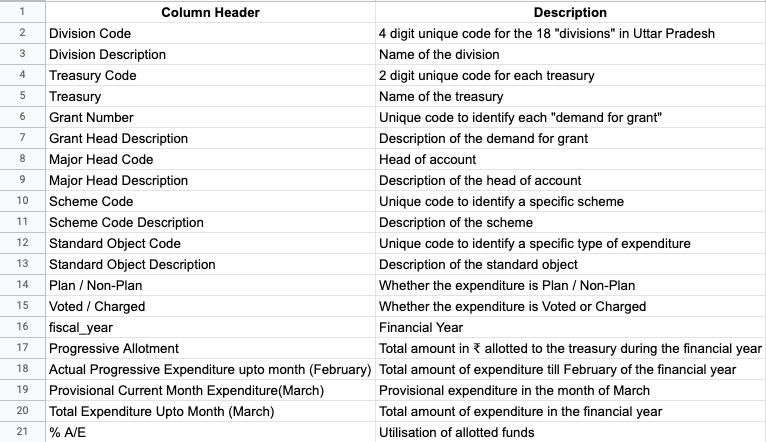

# Work

## Task

Available datasets: expenditure data of UP government for four FYs. 
https://drive.google.com/drive/folders/1leLy55YFop0PphhcrvRMCirI3gVxJ2ky

**Filter expenditure related to only school education.**
* Calculate the share of expenditure on school education incurred by various departments/ministries.
* Estimate the share of capital expenditure.
* Using projected population for each of the years under consideration, estimate the per-capita expenditure on school education in the state, and each district.
* Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure (separately).

## Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#df_17 = pd.read_csv('/content/gdrive/MyDrive/projects/district_wise_expenditure_data/district_level_mapping_2017.csv', dtype = {'Scheme Code': str})
#df_18 = pd.read_csv('/content/gdrive/MyDrive/projects/district_wise_expenditure_data/district_level_mapping_2018.csv', dtype = {'Scheme Code': str})
#df_19 = pd.read_csv('/content/gdrive/MyDrive/projects/district_wise_expenditure_data/district_level_mapping_2019.csv', dtype = {'Scheme Code': str})
#df_20 = pd.read_csv('/content/gdrive/MyDrive/projects/district_wise_expenditure_data/district_level_mapping_2020.csv', dtype = {'Scheme Code': str})

# concat all dfs
#df = pd.concat([df_17, df_18, df_19, df_20])

### Translate columns with Hindi values

Credits: https://towardsdatascience.com/translate-a-pandas-data-frame-using-googletrans-library-fb0aa7fca592

https://stackoverflow.com/questions/52455774/googletrans-stopped-working-with-error-nonetype-object-has-no-attribute-group

* आबकारी विभाग - Excise Department (Grant Head Description)
* राज्य उत्पाद शुल्क - State excise duty (Major Head Description)
* अधीक्षण - Superintendent (Scheme Code Description)
* वेतन - Salary (Standard Object Description)

In [4]:
#install googletrans using pip
#!pip install googletrans==4.0.0-rc1

#from googletrans import Translator

In [5]:
#translator = Translator()

use translate method to translate each Hindi value into a dictionary of unique values with English translation

In [6]:
#translation = translator.translate('이 문장은 한글로 쓰여졌습니다.', dest='en')
#print(translation.text)
#This sentence is written in Korean.

In [7]:
#GHD_unique = {text : translator.translate(text, dest='en').text for text in df_20['Grant Head Description'].unique()}

In [8]:
#MHD_unique = {text : translator.translate(text, dest='en').text for text in df_20['Major Head Description'].unique()}

In [9]:
#SCD_unique = {text : translator.translate(text, dest='en').text for text in df_20['Scheme Code Description'].unique()}

In [10]:
#SOD_unique = {text : translator.translate(text, dest='en').text for text in df_20['Standard Object Description'].unique()}

In [11]:
# Save
#np.save('/content/gdrive/MyDrive/projects/GHD_unique.npy', GHD_unique)
#np.save('/content/gdrive/MyDrive/projects/MHD_unique.npy', MHD_unique)
#np.save('/content/gdrive/MyDrive/projects/SCD_unique.npy', SCD_unique)
#np.save('/content/gdrive/MyDrive/projects/SOD_unique.npy', SOD_unique)

In [12]:
# Load
#GHD_unique = np.load('/content/gdrive/MyDrive/projects/GHD_unique.npy', allow_pickle='TRUE').item()
#MHD_unique = np.load('/content/gdrive/MyDrive/projects/MHD_unique.npy', allow_pickle='TRUE').item()
#SCD_unique = np.load('/content/gdrive/MyDrive/projects/SCD_unique.npy', allow_pickle='TRUE').item()
#SOD_unique = np.load('/content/gdrive/MyDrive/projects/SOD_unique.npy', allow_pickle='TRUE').item()

In [13]:
#set(df['Grant Head Description']) - {'-'}

In [14]:
#{1}.issubset({1})

In [15]:
#check if dict is complete
#(set(df['Grant Head Description']) - {'-'}).issubset(set(GHD_unique))

In [16]:
#(set(df['Major Head Description']) - {'-'}).issubset(set(MHD_unique))

In [17]:
#(set(df['Scheme Code Description']) - {'-'}).issubset(set(SCD_unique))

In [18]:
#(set(df['Standard Object Description']) - {'-'}).issubset(set(SOD_unique))

In [19]:
#need to update the dicts
#new_GHD = set(df['Grant Head Description']) - {'-'} - set(GHD_unique)

In [20]:
#new_MHD = set(df['Major Head Description']) - {'-'} - set(MHD_unique)
#new_SCD = set(df['Scheme Code Description']) - {'-'} - set(SCD_unique)
#new_SOD = set(df['Standard Object Description']) - {'-'} - set(SOD_unique)

In [21]:
# add translations
#GHD_tran = {text : translator.translate(text, dest='en').text for text in new_GHD}
#MHD_tran = {text : translator.translate(text, dest='en').text for text in new_MHD}
#SCD_tran = {text : translator.translate(text, dest='en').text for text in new_SCD}
#SOD_tran = {text : translator.translate(text, dest='en').text for text in new_SOD}

In [22]:
# update
#GHD_unique.update(GHD_tran)
#MHD_unique.update(MHD_tran)
#SCD_unique.update(SCD_tran)
#SOD_unique.update(SOD_tran)

In [23]:
# Save
#np.save('/content/gdrive/MyDrive/projects/trans_dict/GHD_unique.npy', GHD_unique)
#np.save('/content/gdrive/MyDrive/projects/trans_dict/MHD_unique.npy', MHD_unique)
#np.save('/content/gdrive/MyDrive/projects/trans_dict/SCD_unique.npy', SCD_unique)
#np.save('/content/gdrive/MyDrive/projects/trans_dict/SOD_unique.npy', SOD_unique)

In [24]:
# Load
#GHD_unique = np.load('/content/gdrive/MyDrive/projects/trans_dict/GHD_unique.npy', allow_pickle='TRUE').item()
#MHD_unique = np.load('/content/gdrive/MyDrive/projects/trans_dict/MHD_unique.npy', allow_pickle='TRUE').item()
#SCD_unique = np.load('/content/gdrive/MyDrive/projects/trans_dict/SCD_unique.npy', allow_pickle='TRUE').item()
#SOD_unique = np.load('/content/gdrive/MyDrive/projects/trans_dict/SOD_unique.npy', allow_pickle='TRUE').item()

In [25]:
# create new column with English translation, by replacing values in corresponding Hindi column with English values
#df['Dept'] = df['Grant Head Description'].replace(GHD_unique)

In [26]:
#df['Major Head'] = df['Major Head Description'].replace(MHD_unique)

In [27]:
#df['Scheme'] = df['Scheme Code Description'].replace(SCD_unique)

In [28]:
#df['Minor Head'] = df['Standard Object Description'].replace(SOD_unique)

In [29]:
#df.drop(['Grant Head Description', 'Major Head Description', 'Scheme Code Description', 'Standard Object Description'], 
#        axis = 1,
#        inplace = True)

In [30]:
#file_name = 'df_combined.csv'

#df.to_csv(file_name, index=False) 
    
#from google.colab import files 
#files.download(file_name)

### Read new DataFrame with translated columns

In [31]:
missing_values = ["n/a", "na", "-"]

df = pd.read_csv('/content/gdrive/MyDrive/projects/school_expen/df_combined.csv', 
                 na_values = missing_values, 
                 dtype = {'Scheme Code': str,
                          'Division Code': str,
                          'Treasury Code': str,
                          'Grant Number': str,
                          'Major Head Code': str,
                          'Standard Object Code': str})

##Summarise data

In [32]:
df.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Major Head Code,Scheme Code,Standard Object Code,Plan / Non-Plan,Voted / Charged,...,Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E,Actual Progressive Expenditure upto month (February),Provisional Current Month Expenditure(March),Total Expenditure Upto Month (March),Dept,Major Head,Scheme,Minor Head
0,800.0,AGRA,8.0,AGRA,1,2039,2039000010300,1,N,V,...,0.0,5438225.0,90.35,NaN,NaN,NaN,Excise Department,State excise duty,Superintendence,Salary
1,800.0,AGRA,8.0,AGRA,1,2039,2039000010300,3,N,V,...,0.0,344832.0,229.89,NaN,NaN,NaN,Excise Department,State excise duty,Superintendence,dearness allowance
2,800.0,AGRA,8.0,AGRA,1,2039,2039000010300,4,N,V,...,0.0,17045.0,48.70,NaN,NaN,NaN,Excise Department,State excise duty,Superintendence,traveling expenses
3,800.0,AGRA,8.0,AGRA,1,2039,2039000010300,5,N,V,...,0.0,0.0,0.00,NaN,NaN,NaN,Excise Department,State excise duty,Superintendence,Transfer travel expenses
4,800.0,AGRA,8.0,AGRA,1,2039,2039000010300,6,N,V,...,0.0,336648.0,134.66,NaN,NaN,NaN,Excise Department,State excise duty,Superintendence,other allowances


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338561 entries, 0 to 1338560
Data columns (total 23 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   Division Code                                         1322511 non-null  object 
 1   Division Description                                  1322511 non-null  object 
 2   Treasury Code                                         1322511 non-null  object 
 3   Treasury                                              1336601 non-null  object 
 4   Grant Number                                          1338561 non-null  object 
 5   Major Head Code                                       1338561 non-null  object 
 6   Scheme Code                                           1338561 non-null  object 
 7   Standard Object Code                                  1338561 non-null  object 
 8   Plan / Non-Plan                 

# Preprocessing and Exploratory Data Analysis (EDA)

### add new columns and replacing values using Scheme Code

In [34]:
# we check the length of Scheme code values
set(df['Scheme Code'].map(lambda x: len(x)))

{11, 13}

In [35]:
# to check data of a scheme code with 11 length string
# here Land Revenue should have Major Code '00' and Scheme code should begin with '00'
temp = '29001010102'
ndf = df.copy()
ndf.set_index('Scheme Code', inplace=True)
ndf.loc[temp]

Division Code                                                     2800.0
Division Description                                            MIRZAPUR
Treasury Code                                                       28.0
Treasury                                                        MIRZAPUR
Grant Number                                                         REC
Major Head Code                                                       29
Standard Object Code                                                   0
Plan / Non-Plan                                                        N
Voted / Charged                                                        V
fiscal_year                                                    2017-2018
Progressive Allotment                                                0.0
Actual Progressive Expenditure upto month (October)           13439801.0
Provisional Current Month Expenditure(November)                      0.0
Total Expenditure Upto Month (November)            

In [36]:
# clearly no Scheme Code begins with '0'
[x for x in df['Scheme Code'] if x[0] == '0']

[]

In [37]:
# rename columns
#df.rename(columns = {'Major Head Code':'major_head'}, inplace=True);

In [38]:
# create new major_head with first two digits, if 'Scheme Code' of length 13, else with ''
df['major_head'] = df['Scheme Code'].map(lambda x: x[:-11])
# replace '' with '00'
df['major_head'] = df['major_head'].replace('','00')
# add next 2 digits
df['major_head'] = df['major_head'] + df['Scheme Code'].map(lambda x: x[-11:-9])

In [39]:
# check for major_head with '00' start
[x for x in df['major_head'] if x[:2] == '00'];

In [40]:
# create new columns 
df['sub_major_head'] = (df['Scheme Code']).map(lambda x: x[-9:-7])
df['minor_head'] = (df['Scheme Code']).map(lambda x: x[-7:-4])

In [41]:
#print(temp + '\n'+ temp[-11:-9])

In [42]:
df.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Major Head Code,Scheme Code,Standard Object Code,Plan / Non-Plan,Voted / Charged,...,Actual Progressive Expenditure upto month (February),Provisional Current Month Expenditure(March),Total Expenditure Upto Month (March),Dept,Major Head,Scheme,Minor Head,major_head,sub_major_head,minor_head
0,800.0,AGRA,8.0,AGRA,1,2039,2039000010300,1,N,V,...,NaN,NaN,NaN,Excise Department,State excise duty,Superintendence,Salary,2039,00,001
1,800.0,AGRA,8.0,AGRA,1,2039,2039000010300,3,N,V,...,NaN,NaN,NaN,Excise Department,State excise duty,Superintendence,dearness allowance,2039,00,001
2,800.0,AGRA,8.0,AGRA,1,2039,2039000010300,4,N,V,...,NaN,NaN,NaN,Excise Department,State excise duty,Superintendence,traveling expenses,2039,00,001
3,800.0,AGRA,8.0,AGRA,1,2039,2039000010300,5,N,V,...,NaN,NaN,NaN,Excise Department,State excise duty,Superintendence,Transfer travel expenses,2039,00,001
4,800.0,AGRA,8.0,AGRA,1,2039,2039000010300,6,N,V,...,NaN,NaN,NaN,Excise Department,State excise duty,Superintendence,other allowances,2039,00,001


### drop duplicates

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338561 entries, 0 to 1338560
Data columns (total 26 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   Division Code                                         1322511 non-null  object 
 1   Division Description                                  1322511 non-null  object 
 2   Treasury Code                                         1322511 non-null  object 
 3   Treasury                                              1336601 non-null  object 
 4   Grant Number                                          1338561 non-null  object 
 5   Major Head Code                                       1338561 non-null  object 
 6   Scheme Code                                           1338561 non-null  object 
 7   Standard Object Code                                  1338561 non-null  object 
 8   Plan / Non-Plan                 

In [44]:
#drop duplicates
df = df.drop_duplicates(keep='first')

In [45]:
df.info() # dropped from 13,38,561 to 7,83,719 records (though earlier opteration 7,84,708 records, strange!)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783719 entries, 0 to 1338560
Data columns (total 26 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Division Code                                         773654 non-null  object 
 1   Division Description                                  773654 non-null  object 
 2   Treasury Code                                         773654 non-null  object 
 3   Treasury                                              783555 non-null  object 
 4   Grant Number                                          783719 non-null  object 
 5   Major Head Code                                       783719 non-null  object 
 6   Scheme Code                                           783719 non-null  object 
 7   Standard Object Code                                  783719 non-null  object 
 8   Plan / Non-Plan                            

###Missing values

In [46]:
df.columns[:11]

Index(['Division Code', 'Division Description', 'Treasury Code', 'Treasury',
       'Grant Number', 'Major Head Code', 'Scheme Code',
       'Standard Object Code', 'Plan / Non-Plan', 'Voted / Charged',
       'fiscal_year'],
      dtype='object')

In [47]:
# columns with missing values
[col for col in df.columns[:11]
 if df[col].isna().any()]

['Division Code', 'Division Description', 'Treasury Code', 'Treasury']

#### check if expenditure values have missing values

In [48]:
# as Expenditure in FY20-21 is recorded till March, instead of earlier November
# check for missing values in expenditure data
# if True, then no missing values
print(df['Total Expenditure Upto Month (November)'].count(),
      df['Total Expenditure Upto Month (March)'].count(),
      df.shape[0])
df['Total Expenditure Upto Month (November)'].count() + df['Total Expenditure Upto Month (March)'].count() == df.shape[0]

591092 192627 783719


True

In [49]:
# check how expenses are recorded
for year, frame in df.groupby('fiscal_year'):
    if frame['Total Expenditure Upto Month (March)'].isna().all():
        print('for year {}, use column Total Expenditure Upto Month (November)'.
              format(year))
    if frame['Total Expenditure Upto Month (November)'].isna().all():
        print('for year {}, use column Total Expenditure Upto Month (March)'.
              format(year))

for year 2017-2018, use column Total Expenditure Upto Month (November)
for year 2018-2019, use column Total Expenditure Upto Month (November)
for year 2019-2020, use column Total Expenditure Upto Month (November)
for year 2020-2021, use column Total Expenditure Upto Month (March)


In [50]:
# add new column with total expenditure combining both columns
df['total_expenditure'] = df['Total Expenditure Upto Month (November)'].fillna(0) + df['Total Expenditure Upto Month (March)'].fillna(0)

###Unique values

In [51]:
# number of unique values in each head
df.nunique()

Division Code                                               18
Division Description                                        18
Treasury Code                                               81
Treasury                                                   257
Grant Number                                                95
Major Head Code                                            146
Scheme Code                                               3568
Standard Object Code                                        67
Plan / Non-Plan                                              2
Voted / Charged                                              2
fiscal_year                                                  4
Progressive Allotment                                   134420
Actual Progressive Expenditure upto month (October)     246578
Provisional Current Month Expenditure(November)              1
Total Expenditure Upto Month (November)                 246578
% A/E                                                  

##Inference from EDA:

(Inference outdated - need to update)
1. The Treasury code has only 78 values but Treasury has 103 values. Reasons:
    * Variations in name of Treasury for corresponding Treasury Code
    * null values in Treasury Code for corresponding Treasury
    * both of the above
2. check if all values contain 'विभाग' (department) in 'Grant Head Description'
3. df['Provisional Current Month Expenditure(March)'] + df['Actual Progressive Expenditure upto month (February)'] == df['Total Expenditure Upto Month (March)']
4. Standard Object Description (Minor Head) column cannot give meaningful results on school education, as while it has items like *Scholarships and students*, it fails to have other indicators like descriptions on *Teachers* or *text books*

## Basic Analysis to test assumptions

#### Dealing with Treasury values

In [52]:
df['Treasury'].unique()[:10]
# We can infer that Treasury values are similar to districts in UP
# https://en.wikipedia.org/wiki/List_of_districts_of_Uttar_Pradesh

array(['AGRA', 'ALIGARH', 'ALLAHABAD', 'AMBEDKARNAGAR', 'AURAIYA',
       'AZAMGARH', 'BADAUN', 'BAGHPAT SADAR', 'BANDA', 'BARABANKI'],
      dtype=object)

In [53]:
# print the multiple values in 'Treasury' for each 'Treasury Code' value
flag = False
for code in df['Treasury Code'].unique():
    list_ = df['Treasury'].where(df['Treasury Code'] == code).dropna().unique()
    if len(list_) > 1:
        print(list_)
        flag = True
if flag == False:
    print('No \'Treasury Code\' value has multiple \'Treasury\' value')

No 'Treasury Code' value has multiple 'Treasury' value


### 'Grant Head Description' analysis

In [54]:
# check if all values contain 'विभाग' in 'Grant Head Description':
#df['Grant Head Description'].str.contains('विभाग').unique()

In [55]:
# False shows that some don't contain 'विभाग'
# Lets print those values

#df['Grant Head Description'].where(
#    df['Grant Head Description'].str.contains('विभाग') == False).dropna().unique()

All values are part of some Department ('विभाग') except for
* विधान परिषद् सचिवालय is Legislative Council Secretariat
* विधान सभा सचिवालय is Legislative Assembly Secretariat

### Check for '-' values

In [56]:
(df['Dept']=='-').unique()

array([False])

In [57]:
# False values implies '-' does not exist in particular column
#col_vals = list(map(lambda x: df[x].astype(str).str.contains('-').unique(), df.columns))
col_vals = list(map(lambda x: (df[x]=='-').unique(), df.columns))
dict(zip(df.columns, col_vals))

{'% A/E': array([False]),
 'Actual Progressive Expenditure upto month (February)': array([False]),
 'Actual Progressive Expenditure upto month (October)': array([False]),
 'Dept': array([False]),
 'Division Code': array([False]),
 'Division Description': array([False]),
 'Grant Number': array([False]),
 'Major Head': array([False]),
 'Major Head Code': array([False]),
 'Minor Head': array([False]),
 'Plan / Non-Plan': array([False]),
 'Progressive Allotment': array([False]),
 'Provisional Current Month Expenditure(March)': array([False]),
 'Provisional Current Month Expenditure(November)': array([False]),
 'Scheme': array([False]),
 'Scheme Code': array([False]),
 'Standard Object Code': array([False]),
 'Total Expenditure Upto Month (March)': array([False]),
 'Total Expenditure Upto Month (November)': array([False]),
 'Treasury': array([False]),
 'Treasury Code': array([False]),
 'Voted / Charged': array([False]),
 'fiscal_year': array([False]),
 'major_head': array([False]),
 'minor_

In [58]:
# no '-' value as we treated for it earlier

## Inference from basic analysis
1. Null values in place of 25 unique 'Treasury Code' values. Thus we will label encode Tresury values for analysis, instead of using Treasury Code values


#Tasks

## *Filter expenditure related to only school education.*

Given:
* Under Revenue expenditure: School education expenses comes under General Education (under elementary and secondary education minor heads)
* Under Capital expenditure: expenses under Capital Outlay on Education, etc

Steps taken:
1. Consider all education expenditure Major Head codes: 2202-2205 (Revenue expenditure), 4202 (Capital Expenditure)
2. Then consider sub-major and minor codes within major heads to analyse school education expenditure based on descriptions

Assumptions:
* We can assume all expenses under Department of Primary and Secondary education count as school expenditure (under Dept column, earlier Grant Head Desc.)
* Any record/row with 'scholarships and students' (under Minor Head column, earlier Standard Object Desc.) can be considered for school education, but closer scrutiny will be required to make sure this expense is only for school children

link to spreadsheet: https://docs.google.com/spreadsheets/d/1pWv4uIJ2IQ_e2B7Ja1PDhhRp_NBh8ECpx1tAjS449H0/edit#gid=853536697

In [59]:
df.columns

Index(['Division Code', 'Division Description', 'Treasury Code', 'Treasury',
       'Grant Number', 'Major Head Code', 'Scheme Code',
       'Standard Object Code', 'Plan / Non-Plan', 'Voted / Charged',
       'fiscal_year', 'Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Provisional Current Month Expenditure(November)',
       'Total Expenditure Upto Month (November)', '% A/E',
       'Actual Progressive Expenditure upto month (February)',
       'Provisional Current Month Expenditure(March)',
       'Total Expenditure Upto Month (March)', 'Dept', 'Major Head', 'Scheme',
       'Minor Head', 'major_head', 'sub_major_head', 'minor_head',
       'total_expenditure'],
      dtype='object')

In [60]:
desc_cols = ['Dept', 'Major Head', 'Scheme', 'Minor Head']

#relevant head values
# major_head = 2202 - general education
# major_head = 2203 - technical education
# major_head = 2204 - sports and youth services
# major_head = 2205 - Art and culture
# major_head = 4202 - capital expenditure on education

exp_cols = ['fiscal_year', 'Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Provisional Current Month Expenditure(November)',
       'Total Expenditure Upto Month (November)', '% A/E',
       'Actual Progressive Expenditure upto month (February)',
       'Provisional Current Month Expenditure(March)',
       'Total Expenditure Upto Month (March)']

#### Revenue

In [61]:
# set of departments that spend on education (revenue), on primary and secondary education
pri_sec_edu_set = set(df['Dept'].where(
    (df.major_head == '2202')
    & ((df.sub_major_head == '01')
    | (df.sub_major_head == '02'))).dropna().unique())
pri_sec_edu_set

{'Education Department (Primary Education)',
 'Education Department (Secondary Education)',
 'Housing department',
 'Muslim Waqf Department',
 'Social Welfare Department (Special Component Plan for Scheduled Castes)',
 'Social welfare department (tribe welfare)'}

In [62]:
# set of departments that spend on General Education (revenue) (sub-major head 80)
all_edu_gen_exp_set = set(df['Dept'].where(
    (df.major_head == '2202')
    & (df.sub_major_head == '80')).dropna().unique())
all_edu_gen_exp_set

{'Administrative reform department',
 'Education Department (State Educational Research and Training Council)',
 'Language department',
 'Muslim Waqf Department',
 'Social Welfare Department (Special Component Plan for Scheduled Castes)'}

In [63]:
# set of those General Expenditure (sub-major head 80) that DONT spend on primary and secondary education
all_edu_gen_exp_set - pri_sec_edu_set

{'Administrative reform department',
 'Education Department (State Educational Research and Training Council)',
 'Language department'}

In [64]:
# index values of primary and secondary education (revenue) expenditure, and
# index values of general education (revenue) expenditure, 
# excluding those department that do not fall under primary and secondary education
edu_rev_exp_index = df.index.where(
    (df.major_head == '2202')
    & ((df.sub_major_head == '01') | (df.sub_major_head == '02') | (df.sub_major_head == '05'))
    & (df.Dept != 'Administrative reform department')
    & (df.Dept != 'Education Department (State Educational Research and Training Council)')
    & (df.Dept != 'Language department')
    ).dropna().astype(int)
edu_rev_exp_index

Int64Index([   2167,  180081,  180082,  180083,  180084,  180085,  180086,
             180087,  180088,  180089,
            ...
            1303553, 1303554, 1303555, 1303556, 1303557, 1303558, 1303559,
            1303560, 1303561, 1303562],
           dtype='int64', length=38672)

#### Capital

In [65]:
# set of departments that spend on education (capital), on primary and secondary education
# 201 - Elementary Education, 202 - Secondary Education (minor heads)
pri_sec_edu_set = set(df['Dept'].where(
    (df.major_head == '4202')
    & (df.sub_major_head == '01')
    & ((df.minor_head == '201') | (df.minor_head == '202'))
    ).dropna().unique())
pri_sec_edu_set

{'Education Department (Primary Education)',
 'Education Department (Secondary Education)',
 'Education Department (State Educational Research and Training Council)',
 'Labor department (labor welfare)'}

In [66]:
# set of departments that spend on General Education (capital)
# 600 - General, 800 Other (minor heads)
all_edu_gen_exp_set = set(df['Dept'].where(
    (df.major_head == '4202')
    & (df.sub_major_head == '01')
    & ((df.minor_head == '600') | (df.minor_head == '800'))
    ).dropna().unique())
all_edu_gen_exp_set

{'Education Department (Higher Education)', 'Muslim Waqf Department'}

In [67]:
# set of those General Expenditure that DONT spend on primary and secondary education
all_edu_gen_exp_set - pri_sec_edu_set

{'Education Department (Higher Education)', 'Muslim Waqf Department'}

In [68]:
# index values of primary and secondary education (capital) expenditure
# Captial Expenditure | 4202 (major heads) -01 (sub major) - 
# 201 - Elementary Education, 202 - Secondary Education, 
# we exclude 600 - General, 800 Other (minor heads) as those departments don't spend on school education
edu_cap_exp_index = df.index.where(
    (df.major_head == '4202')
    & (df.sub_major_head == '01')
    & ((df.minor_head == '201') | (df.minor_head == '202'))
    ).dropna().astype(int)
edu_cap_exp_index 

Int64Index([ 302086,  302087,  302088,  302089,  302090,  302091,  302092,
             302093,  302094,  302095,
            ...
            1280843, 1280844, 1280845, 1280846, 1280847, 1280848, 1280849,
            1280850, 1280851, 1285927],
           dtype='int64', length=517)

#### Combine all data

In [69]:
school_edu = pd.concat([df.loc[edu_rev_exp_index], df.loc[edu_cap_exp_index]])

## *Calculate the share of expenditure on school education incurred by various departments/ministries.*

Calculated share of expenditure by Primary and Secondary Education departments in overall expenditure

In [70]:
# total budget expenditure for each FY
(df.groupby('fiscal_year')['total_expenditure'].sum())

fiscal_year
2017-2018    2.862726e+12
2018-2019    2.687311e+12
2019-2020    3.096387e+12
2020-2021    2.323866e+12
Name: total_expenditure, dtype: float64

In [71]:
print("Expenditure on school education of the total expenditure by state")
exp_list = []

for year, yr_frame in school_edu.groupby('fiscal_year'):
    print("\nFor the year %s\n"%(year))
    
    for dept, yr_dept_frame in yr_frame.groupby('Dept'):
        val = ((yr_dept_frame['total_expenditure'].sum())/
               ((df.groupby('fiscal_year')['total_expenditure'].sum())[year])
               *100)
        
        exp_list.append((year, dept, val))

        print("{:.3}% by {}".format(val, dept))

Expenditure on school education of the total expenditure by state

For the year 2017-2018

13.7% by Education Department (Primary Education)
2.85% by Education Department (Secondary Education)
0.000607% by Education Department (State Educational Research and Training Council)
0.000388% by Housing department
0.242% by Muslim Waqf Department
0.706% by Social Welfare Department (Special Component Plan for Scheduled Castes)
0.0305% by Social welfare department (tribe welfare)

For the year 2018-2019

14.0% by Education Department (Primary Education)
3.27% by Education Department (Secondary Education)
0.000826% by Housing department
0.279% by Muslim Waqf Department
1.01% by Social Welfare Department (Special Component Plan for Scheduled Castes)
0.026% by Social welfare department (tribe welfare)

For the year 2019-2020

13.6% by Education Department (Primary Education)
3.1% by Education Department (Secondary Education)
0.000423% by Housing department
0.0581% by Labor department (labor welfa

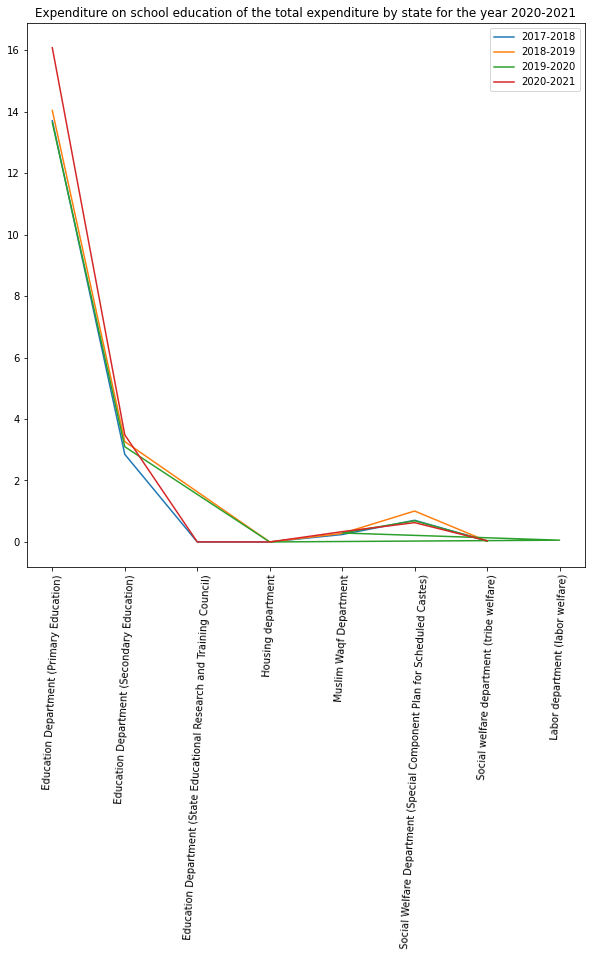

In [72]:
plt.figure(figsize=(10,10))

for i, year in enumerate(school_edu['fiscal_year'].unique()): 
    #plt.subplot(2,2,i+1)
    x = [i[1] for i in exp_list if i[0] == year]
    y = [i[2] for i in exp_list if i[0] == year]
    plt.plot(x, y)

    # rotate axis 
    x = plt.gca().xaxis
    for item in x.get_ticklabels():
        item.set_rotation(87)

    plt.legend(school_edu['fiscal_year'].unique(), loc=0)
    plt.title('Expenditure on school education of the total expenditure by state for the year '+year)

##*Estimate the share of capital expenditure.*

In [73]:
# school_edu = pd.concat([df.loc[edu_rev_exp_index], df.loc[edu_cap_exp_index]])
len(edu_cap_exp_index)

517

In [74]:
print("Share of revenue expenditure in school education in the past years")
rev_exp_list = []

for year in school_edu['fiscal_year'].unique():
    val = (((school_edu[:len(edu_rev_exp_index)].groupby('fiscal_year')['total_expenditure'].sum())[year])/
            ((school_edu.groupby('fiscal_year')['total_expenditure'].sum())[year])*100)
    
    rev_exp_list.append((year, val))

    print("For the year {}, {:.3}%".format(year, val))

Share of revenue expenditure in school education in the past years
For the year 2017-2018, 99.4%
For the year 2018-2019, 99.3%
For the year 2019-2020, 98.8%
For the year 2020-2021, 99.5%


In [75]:
print("Share of capital expenditure in school education in the past years")
cap_exp_list = []

for year in school_edu['fiscal_year'].unique():
    val = (((school_edu[-len(edu_cap_exp_index):].groupby('fiscal_year')['total_expenditure'].sum())[year])/
            ((school_edu.groupby('fiscal_year')['total_expenditure'].sum())[year])*100)
    
    cap_exp_list.append((year, val))

    print("For the year {}, {:.4}%".format(year, val))

Share of capital expenditure in school education in the past years
For the year 2017-2018, 0.6196%
For the year 2018-2019, 0.7246%
For the year 2019-2020, 1.182%
For the year 2020-2021, 0.5219%


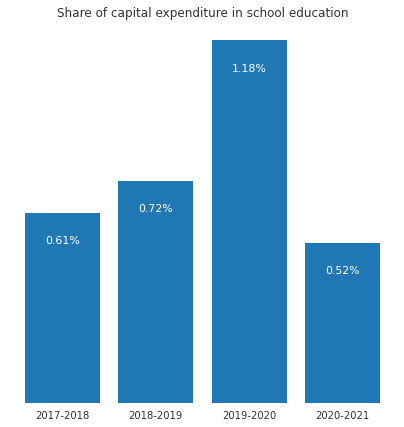

In [76]:
plt.figure(figsize=(7,7))

years = [i[0] for i in cap_exp_list]
vals = [i[1] for i in cap_exp_list]
bars = plt.bar(years, vals, align='center', linewidth=0)
plt.title('Share of capital expenditure in school education', alpha=0.8)

# soften all labels by turning grey
plt.xticks(years, alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(bottom=False, left=False, labelleft=False)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()-0.1, '{:.4}'.format(str(bar.get_height())) + '%', ha='center', color='w', fontsize=11)

plt.show()

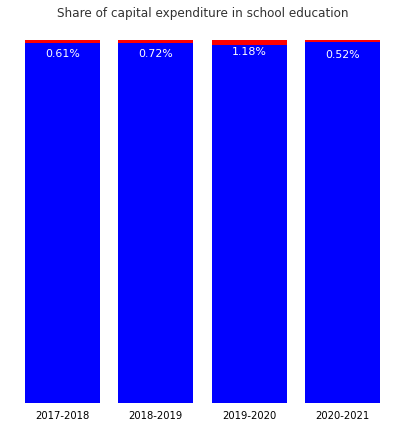

In [77]:
plt.figure(figsize=(7,7))

years = [i[0] for i in rev_exp_list]
rev_vals = [i[1] for i in rev_exp_list]
cap_vals = [i[1] for i in cap_exp_list]
rev_bars = plt.bar(years, rev_vals, linewidth=0, color='b')
cap_bars = plt.bar(years, cap_vals, linewidth=0, color='r', bottom=rev_vals)
plt.title('Share of capital expenditure in school education', alpha=0.8)

#plt.ylim([0, 100])

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(bottom=False, left=False, labelleft=False)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in cap_bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+95, '{:.4}'.format(str(bar.get_height())) + '%', ha='center', color='w', fontsize=11)

plt.show()

##*Using projected population for each of the years under consideration, estimate the per-capita expenditure on school education in the state, and each district.*

### projected population

**Dataset:**
* Population projection - state of UP - 2017 to 2020, based on 2011 census values (pg. 46, https://main.mohfw.gov.in/sites/default/files/Population%20Projection%20Report%202011-2036%20-%20upload_compressed_0.pdf)
* District-wise population data - state of UP, based on 2011 census (https://www.censusindia.gov.in/pca/default.aspx, https://www.censusindia.gov.in/pca/DDW_PCA0000_2011_Indiastatedist.xlsx)

In [78]:
# Calculate rate of growth of population for years 2017-2020

p11 = 199812000 # 2011 - 1,99,812,000 (population of UP based on census)
p17 = 219051000 # 2017 - 2,19,051,000 (projected population)
p18 = 222015000 # 2018 - 2,22,015,000 (projected population)
p19 = 224979000 # 2019 - 2,24,979,000 (projected population)
p20 = 227943000 # 2020 - 2,27,943,000 (projected population)

In [79]:
def float_format(prompt):
    return float("{:.5f}".format(prompt))

In [80]:
r_17 = float_format(((p17/p11)**(1/6) - 1)*100)
r_18 = float_format(((p18/p11)**(1/7) - 1)*100)
r_19 = float_format(((p19/p11)**(1/8) - 1)*100)
r_20 = float_format(((p20/p11)**(1/9) - 1)*100)

yr_rates = [(2017,r_17), 
         (2018,r_18), 
         (2019,r_19), 
         (2020,r_20)]
print(yr_rates)

[(2017, 1.54392), (2018, 1.51664), (2019, 1.49393), (2020, 1.4743)]


**Assumptions:** growth rate of each district is assumed to be equal to growth rate of entire state, in any particular year

Using above assumption, we calculate projected population of each district by:

In [81]:
# upload district population data based on 2011 census
dist_popl = pd.read_csv('/content/gdrive/MyDrive/projects/school_expen/Population Data - main data.csv', skiprows=1)
dist_popl.columns = ['district', 'popl']

In [82]:
dist_popl.head()

,district,popl
0,Saharanpur,3466382
1,Muzaffarnagar,4143512
2,Bijnor,3682713
3,Moradabad,4772006
4,Rampur,2335819


In [83]:
# given a population, we project population for years 2017-2020 for given rates in yr_rates
def proj_popl(popl):
    return pd.Series([popl*((1+val[1]/100)**(val[0]-2011)) for val in yr_rates])

In [84]:
p11 = 199812000 # 2011 - 1,99,812,000 (population of UP based on census)
# 2017 - 2,19,051,000 (projected population)
# 2018 - 2,22,015,000 (projected population)
# 2019 - 2,24,979,000 (projected population)
# 2020 - 2,27,943,000 (projected population)

proj_popl(p11) #these match total UP population projections

0    2.190509e+08
1    2.220149e+08
2    2.249791e+08
3    2.279429e+08
dtype: float64

In [85]:
# now we project population for each district, in given years
dist_popl[list(school_edu['fiscal_year'].unique())] = dist_popl['popl'].apply(proj_popl)
dist_popl.head()

,district,popl,2017-2018,2018-2019,2019-2020,2020-2021
0,Saharanpur,3466382,3.800143e+06,3.851564e+06,3.902986e+06,3.954404e+06
1,Muzaffarnagar,4143512,4.542471e+06,4.603936e+06,4.665403e+06,4.726865e+06
2,Bijnor,3682713,4.037304e+06,4.091933e+06,4.146565e+06,4.201191e+06
3,Moradabad,4772006,5.231480e+06,5.302267e+06,5.373058e+06,5.443843e+06
4,Rampur,2335819,2.560724e+06,2.595373e+06,2.630024e+06,2.664672e+06


### per-capita expenditure in the state
given as, total school expenditure / total population of state

In [86]:
# projected population for the state of UP
up_popl = pd.Series([p17, p18, p19, p20], index=list(school_edu['fiscal_year'].unique()))
up_popl

2017-2018    219051000
2018-2019    222015000
2019-2020    224979000
2020-2021    227943000
dtype: int64

In [87]:
print("Per-capita expenditure on school education in the state of UP")
exp_list = []

for year in school_edu['fiscal_year'].unique():
    val = int(np.round(((school_edu.groupby('fiscal_year')['total_expenditure'].sum())[year])/
              up_popl[year]))
    
    exp_list.append((year, val))

    print("For the year {}, ₹{}".format(year, val))

Per-capita expenditure on school education in the state of UP
For the year 2017-2018, ₹2292
For the year 2018-2019, ₹2253
For the year 2019-2020, ₹2453
For the year 2020-2021, ₹2097


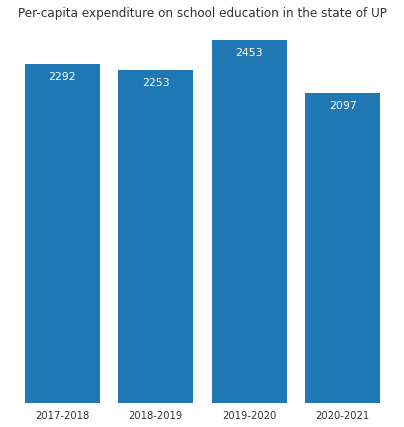

In [88]:
plt.figure(figsize=(7,7))

years = [i[0] for i in exp_list]
vals = [i[1] for i in exp_list]
bars = plt.bar(years, vals, align='center', linewidth=0)
plt.title("Per-capita expenditure on school education in the state of UP", alpha=0.8)

# soften all labels by turning grey
plt.xticks(years, alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(bottom=False, left=False, labelleft=False)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()-100, '{:.4}'.format(str(bar.get_height())), ha='center', color='w', fontsize=11)

plt.show()

### per-capita expenditure in each district
given as, school expenditure in district / total population in district

#### preprocessing of Treasury values

In [89]:
# check for missing values in school_edu data

print(school_edu.columns, '\n')

[col for col in school_edu.columns[:11]
 if school_edu[col].isna().any()]

Index(['Division Code', 'Division Description', 'Treasury Code', 'Treasury',
       'Grant Number', 'Major Head Code', 'Scheme Code',
       'Standard Object Code', 'Plan / Non-Plan', 'Voted / Charged',
       'fiscal_year', 'Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Provisional Current Month Expenditure(November)',
       'Total Expenditure Upto Month (November)', '% A/E',
       'Actual Progressive Expenditure upto month (February)',
       'Provisional Current Month Expenditure(March)',
       'Total Expenditure Upto Month (March)', 'Dept', 'Major Head', 'Scheme',
       'Minor Head', 'major_head', 'sub_major_head', 'minor_head',
       'total_expenditure'],
      dtype='object') 



['Division Code', 'Division Description', 'Treasury Code']

Treasury values have no null values; we can use that to find district-wise data

In [90]:
set(school_edu.Treasury)

{'AGRA',
 'ALIGARH',
 'ALLAHABAD',
 'ALLAHABAD II',
 'AMBEDKARNAGAR',
 'AURAIYA',
 'AYODHYA',
 'AZAMGARH',
 'BADAUN',
 'BAGHPAT SADAR',
 'BAHRAICH',
 'BALLIA',
 'BALRAMPUR',
 'BANDA',
 'BARABANKI',
 'BAREILLY',
 'BASTI',
 'BHADOHI',
 'BIJNOR',
 'BULANDSHAHR',
 'CHANDAULI',
 'CHITRAKOOT',
 'CSMAHARAJ NAGAR',
 'DEORIA',
 'ETAH',
 'ETAWAH',
 'FAIZABAD',
 'FARRUKHABAD',
 'FATEHPUR',
 'FIROZABAD',
 'G.B.NAGAR',
 'GHAZIABAD',
 'GHAZIPUR',
 'GONDA',
 'GORAKHPUR',
 'HAPUR',
 'HARDOI',
 'HATHRAS',
 'J.P.NAGAR',
 'JAUNPUR',
 'JHANSI-MAIN',
 'KANNAUJ',
 'KANPUR DEHAT',
 'KANPUR NAGAR',
 'KANSHI RAM NAGAR',
 'KAUSHAMBI',
 'KHERI',
 'KUSHI NAGAR',
 'LALITPUR',
 'LUCKNOW COLL.',
 'LUCKNOW-JB',
 'MAHARAJGANJ',
 'MAHOBA',
 'MAINPURI',
 'MATHURA',
 'MAU',
 'MEERUT SADAR',
 'MIRZAPUR',
 'MORADABAD',
 'MUZAFFARNAGAR',
 'ORAI',
 'PILIBHIT',
 'PRATAPGARH',
 'PRAYAGRAJ-CIV',
 'PRAYAGRAJ-COLL',
 'RAEBARELI',
 'RAMPUR',
 'SADAR TRY-HMRPR',
 'SAHARANPUR',
 'SAMBHAL',
 'SANT KABIR NAGR',
 'SHAHJAHANPUR',
 'SHAM

In [91]:
# change to upper case - dist_popl.district
dist_popl.district = dist_popl.district.str.upper()
set(dist_popl.district)
# need to rename 'FAIZABAD' as 'AYODHYA'

{'AGRA',
 'ALIGARH',
 'ALLAHABAD',
 'AMBEDKAR NAGAR',
 'AURAIYA',
 'AZAMGARH',
 'BAGHPAT',
 'BAHRAICH',
 'BALLIA',
 'BALRAMPUR',
 'BANDA',
 'BARA BANKI',
 'BAREILLY',
 'BASTI',
 'BIJNOR',
 'BUDAUN',
 'BULANDSHAHR',
 'CHANDAULI',
 'CHITRAKOOT',
 'DEORIA',
 'ETAH',
 'ETAWAH',
 'FAIZABAD',
 'FARRUKHABAD',
 'FATEHPUR',
 'FIROZABAD',
 'GAUTAM BUDDHA NAGAR',
 'GHAZIABAD',
 'GHAZIPUR',
 'GONDA',
 'GORAKHPUR',
 'HAMIRPUR',
 'HARDOI',
 'JALAUN',
 'JAUNPUR',
 'JHANSI',
 'JYOTIBA PHULE NAGAR',
 'KANNAUJ',
 'KANPUR DEHAT',
 'KANPUR NAGAR',
 'KANSHIRAM NAGAR',
 'KAUSHAMBI',
 'KHERI',
 'KUSHINAGAR',
 'LALITPUR',
 'LUCKNOW',
 'MAHAMAYA NAGAR',
 'MAHOBA',
 'MAHRAJGANJ',
 'MAINPURI',
 'MATHURA',
 'MAU',
 'MEERUT',
 'MIRZAPUR',
 'MORADABAD',
 'MUZAFFARNAGAR',
 'PILIBHIT',
 'PRATAPGARH',
 'RAE BARELI',
 'RAMPUR',
 'SAHARANPUR',
 'SANT KABIR NAGAR',
 'SANT RAVIDAS NAGAR (BHADOHI)',
 'SHAHJAHANPUR',
 'SHRAWASTI',
 'SIDDHARTHNAGAR',
 'SITAPUR',
 'SONBHADRA',
 'SULTANPUR',
 'UNNAO',
 'VARANASI'}

In [92]:
set(dist_popl.district.unique()) - set(school_edu.Treasury.unique())

{'AMBEDKAR NAGAR',
 'BAGHPAT',
 'BARA BANKI',
 'BUDAUN',
 'GAUTAM BUDDHA NAGAR',
 'HAMIRPUR',
 'JALAUN',
 'JHANSI',
 'JYOTIBA PHULE NAGAR',
 'KANSHIRAM NAGAR',
 'KUSHINAGAR',
 'LUCKNOW',
 'MAHAMAYA NAGAR',
 'MAHRAJGANJ',
 'MEERUT',
 'RAE BARELI',
 'SANT KABIR NAGAR',
 'SANT RAVIDAS NAGAR (BHADOHI)',
 'SHRAWASTI',
 'SIDDHARTHNAGAR',
 'SONBHADRA',
 'UNNAO'}

In [93]:
set(school_edu.Treasury.unique()) - set(dist_popl.district.unique())

{'ALLAHABAD II',
 'AMBEDKARNAGAR',
 'AYODHYA',
 'BADAUN',
 'BAGHPAT SADAR',
 'BARABANKI',
 'BHADOHI',
 'CSMAHARAJ NAGAR',
 'G.B.NAGAR',
 'HAPUR',
 'HATHRAS',
 'J.P.NAGAR',
 'JHANSI-MAIN',
 'KANSHI RAM NAGAR',
 'KUSHI NAGAR',
 'LUCKNOW COLL.',
 'LUCKNOW-JB',
 'MAHARAJGANJ',
 'MEERUT SADAR',
 'ORAI',
 'PRAYAGRAJ-CIV',
 'PRAYAGRAJ-COLL',
 'RAEBARELI',
 'SADAR TRY-HMRPR',
 'SAMBHAL',
 'SANT KABIR NAGR',
 'SHAMLI',
 'SIDDHARTH NAGAR',
 'SRAWASTI',
 'TRY.SONBHADRA',
 'UNNAO TREASURY'}

##### check if 'ALLAHABAD II' values are repeated in 'ALLAHABAD'

In [94]:
copy = school_edu.copy()

copy.Treasury = copy.Treasury.replace({'ALLAHABAD II':'ALLAHABAD'})
print(copy.shape)
copy = copy.drop_duplicates(keep='first')
print(copy.shape)

(39189, 27)
(39189, 27)


no repeats, so we will add values in both columns

##### replace values

In [95]:
# values to be renamed from both the above columns
renamed_columns = {'ALLAHABAD':'PRAYAGRAJ (ALLAHABAD)',
                   'ALLAHABAD II':'PRAYAGRAJ (ALLAHABAD)',
                   'AMBEDKARNAGAR':'AMBEDKAR NAGAR',
                   'FAIZABAD':'AYODHYA (FAIZABAD)',
                   'AYODHYA':'AYODHYA (FAIZABAD)',
                   'BADAUN':'BUDAUN (BADAUN)',
                   'BUDAUN':'BUDAUN (BADAUN)',
                   'BAGHPAT':'BAGHPAT SADAR',
                   'BARABANKI':'BARA BANKI',
                   'BHADOHI':'SANT RAVIDAS NAGAR (BHADOHI)',
                   'G.B.NAGAR':'GAUTAM BUDDHA NAGAR',
                   'MAHAMAYA NAGAR':'HATHRAS (MAHAMAYA NAGAR)',
                   'HATHRAS':'HATHRAS (MAHAMAYA NAGAR)',
                   'J.P.NAGAR':'JYOTIBA PHULE NAGAR',
                   'JHANSI-MAIN':'JHANSI',
                   'KANSHIRAM NAGAR':'KANSHI RAM NAGAR',
                   'KUSHINAGAR':'KUSHI NAGAR',
                   'LUCKNOW COLL.':'LUCKNOW',
                   'LUCKNOW-JB':'LUCKNOW',
                   'MAHRAJGANJ':'MAHARAJGANJ',
                   'MEERUT':'MEERUT SADAR',
                   'ORAI':'JALAUN',
                   'PRAYAGRAJ-CIV':'PRAYAGRAJ (ALLAHABAD)',
                   'PRAYAGRAJ-COLL':'PRAYAGRAJ (ALLAHABAD)',
                   'RAEBARELI':'RAE BARELI',
                   'SADAR TRY-HMRPR':'HAMIRPUR',
                   'SANT KABIR NAGR':'SANT KABIR NAGAR',
                   'SIDDHARTHNAGAR':'SIDDHARTH NAGAR',
                   'SRAWASTI':'SHRAWASTI',
                   'TRY.SONBHADRA':'SONBHADRA',
                   'UNNAO TREASURY':'UNNAO'
                   }

In [96]:
# replace values
dist_popl.district = dist_popl.district.replace(renamed_columns)
school_edu.Treasury = school_edu.Treasury.replace(renamed_columns)

In [97]:
# add values
dist_popl.set_index('district', inplace=True)
dist_popl.loc['HAPUR'] = [1328322, *proj_popl(1328322)]
dist_popl.head()

,popl,2017-2018,2018-2019,2019-2020,2020-2021
district,,,,,
SAHARANPUR,3466382.0,3.800143e+06,3.851564e+06,3.902986e+06,3.954404e+06
MUZAFFARNAGAR,4143512.0,4.542471e+06,4.603936e+06,4.665403e+06,4.726865e+06
BIJNOR,3682713.0,4.037304e+06,4.091933e+06,4.146565e+06,4.201191e+06
MORADABAD,4772006.0,5.231480e+06,5.302267e+06,5.373058e+06,5.443843e+06
RAMPUR,2335819.0,2.560724e+06,2.595373e+06,2.630024e+06,2.664672e+06


In [98]:
set(dist_popl.index.unique()) - set(school_edu.Treasury.unique())

set()

In [99]:
set(school_edu.Treasury.unique()) - set(dist_popl.index.unique())

{'CSMAHARAJ NAGAR', 'SAMBHAL', 'SHAMLI'}

**Note: Districts N/A in census 2011 data:**
* *Faizabad* district name changed to *Ayodhya* in November 2018
*  *Amethi* or *Chhatrapati Shahuji Maharaj Nagar ('CSMAHARAJ NAGAR')* - 72nd district, from 1 July 2010 (https://en.wikipedia.org/wiki/Amethi_district)
* *Hapur* was announced as a district named Panchsheel Nagar on Sep 28, 2011. Hapur is a city with a population of 13,28,322. (https://web.archive.org/web/20180413084647/http://hapur.nic.in/index.aspx)
* *SAMBHAL* created in 23 July 2012 (https://en.wikipedia.org/wiki/Sambhal_district)
* *Shamli* carved out from Muzaffarnagar District on 28 September 2011 as Prabudh Nagar and renamed Shamli in July 2012. (https://en.wikipedia.org/wiki/Shamli_district)


In [100]:
# 72 districts
school_edu.shape, dist_popl.shape

((39189, 27), (72, 5))

In [101]:
# drop above districts
school_edu.set_index('Treasury', inplace=True)
school_edu.drop(['CSMAHARAJ NAGAR', 'SAMBHAL', 'SHAMLI'], inplace=True)
school_edu.reset_index(inplace=True)
school_edu.shape

(37861, 27)

In [102]:
set(school_edu.Treasury.unique()) - set(dist_popl.index.unique())

set()

#### filter school education based on Treasury values

In [103]:
print("Per-capita expenditure on school education, district-wise")
exp_df = pd.DataFrame({'district':np.nan, 'year':np.nan, 'exp_per_cap':np.nan}, index={np.nan})

i = 0
for year, yr_frame in school_edu.groupby('fiscal_year'):
    for dist, yr_dist_frame in yr_frame.groupby('Treasury'):
        val = int(np.round((yr_dist_frame['total_expenditure'].sum())/
               (dist_popl.loc[dist,year])))
        exp_df.loc[i] = {'year':year, 'district':dist, 'exp_per_cap':val}
        i=i+1

exp_df.dropna(inplace=True)
exp_df.head()

Per-capita expenditure on school education, district-wise


,district,year,exp_per_cap
0.0,AGRA,2017-2018,1561.0
1.0,ALIGARH,2017-2018,1559.0
2.0,AMBEDKAR NAGAR,2017-2018,2190.0
3.0,AURAIYA,2017-2018,2550.0
4.0,AYODHYA (FAIZABAD),2017-2018,1982.0


In [104]:
exp_df.shape[0], 72*4 # 72 districts, 4 FYs

(288, 288)

In [105]:
print("Per-capita expenditure on school education, district-wise")
exp_list = []

for year, yr_frame in school_edu.groupby('fiscal_year'):
    print("\nFor the year %s\n"%(year))
    
    for dist, yr_dist_frame in yr_frame.groupby('Treasury'):
        val = int(np.round((yr_dist_frame['total_expenditure'].sum())/
               (dist_popl.loc[dist,year])))
        
        exp_list.append((year, dist, val))

        print("₹{} by district of {}".format(val, dist))

Per-capita expenditure on school education, district-wise

For the year 2017-2018

₹1561 by district of AGRA
₹1559 by district of ALIGARH
₹2190 by district of AMBEDKAR NAGAR
₹2550 by district of AURAIYA
₹1982 by district of AYODHYA (FAIZABAD)
₹2231 by district of AZAMGARH
₹1953 by district of BAGHPAT SADAR
₹1620 by district of BAHRAICH
₹1946 by district of BALLIA
₹1653 by district of BALRAMPUR
₹2143 by district of BANDA
₹1812 by district of BARA BANKI
₹1543 by district of BAREILLY
₹1980 by district of BASTI
₹1500 by district of BIJNOR
₹1334 by district of BUDAUN (BADAUN)
₹1699 by district of BULANDSHAHR
₹1919 by district of CHANDAULI
₹2452 by district of CHITRAKOOT
₹2296 by district of DEORIA
₹2128 by district of ETAH
₹2582 by district of ETAWAH
₹2044 by district of FARRUKHABAD
₹1880 by district of FATEHPUR
₹1778 by district of FIROZABAD
₹1275 by district of GAUTAM BUDDHA NAGAR
₹578 by district of GHAZIABAD
₹2014 by district of GHAZIPUR
₹1828 by district of GONDA
₹1900 by district of G

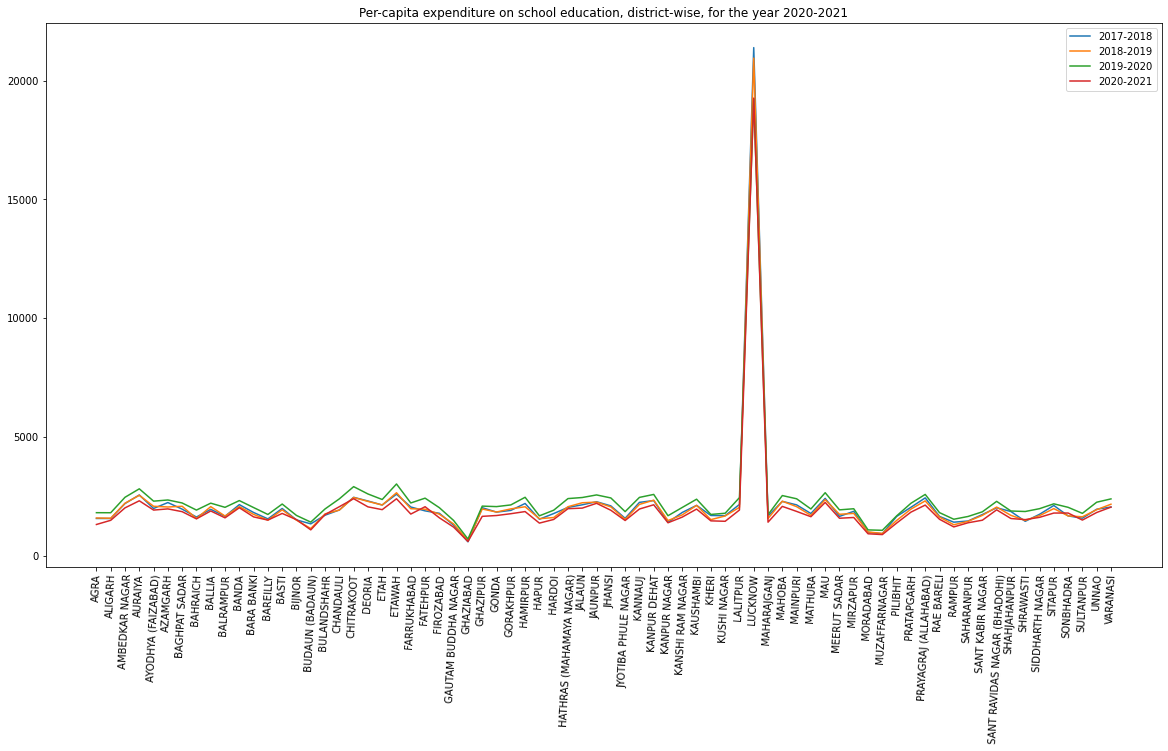

In [106]:
#plt.figure()
plt.figure(figsize=(20,10))

for i, year in enumerate(school_edu['fiscal_year'].unique()): 
    #plt.subplot(2,2,i+1)
    x = [i[1] for i in exp_list if i[0] == year]
    y = [i[2] for i in exp_list if i[0] == year]
    plt.plot(x, y)

    # rotate axis 
    x = plt.gca().xaxis
    for item in x.get_ticklabels():
        item.set_rotation(87)

    plt.legend(school_edu['fiscal_year'].unique(), loc=0)
    plt.title('Per-capita expenditure on school education, district-wise, for the year '+year)


##*Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure (separately).*

In [107]:
df.loc[edu_rev_exp_index,'rev_exp_flag'] = True
df.loc[edu_cap_exp_index,'rev_exp_flag'] = False
school_edu = pd.concat([df.loc[edu_rev_exp_index], df.loc[edu_cap_exp_index]])
school_edu.Treasury = school_edu.Treasury.replace(renamed_columns)

In [108]:
#print("Per-capita expenditure on school education, district-wise")
fund_util_df = pd.DataFrame({'district':np.nan, 'year':np.nan, 'rev_exp':np.nan, 'cap_exp':np.nan}, index={np.nan})

i=0
for year, yr_frame in school_edu.groupby('fiscal_year'):
    for dist, yr_dist_frame in yr_frame.groupby('Treasury'):
        for flag, yr_dist_flag_frame in yr_dist_frame.groupby('rev_exp_flag'):
            if flag == True:
                rev_val = yr_dist_flag_frame['% A/E'].mean()
            else:
                cap_val = yr_dist_flag_frame['% A/E'].mean()
        fund_util_df.loc[i] = {'district':dist, 'year':year, 'rev_exp':rev_val, 'cap_exp':cap_val}
        i=i+1

fund_util_df.dropna(inplace=True)
fund_util_df.head()

,district,year,rev_exp,cap_exp
0.0,AGRA,2017-2018,88.717358,100.000000
1.0,ALIGARH,2017-2018,81.698100,100.000000
2.0,AMBEDKAR NAGAR,2017-2018,75.049364,91.940000
3.0,AURAIYA,2017-2018,73.434466,100.000000
4.0,AYODHYA (FAIZABAD),2017-2018,135.218349,99.356667


In [109]:
fund_util_df.shape[0], 75*4 # 75 districts, 4 FYs 

(300, 300)

In [110]:
for year, frame in fund_util_df.groupby('year'):
    print("\nFor the year "+year+":")
    print(frame.sort_values(by=['rev_exp'], ascending=False).drop(['cap_exp','year'],axis=1).set_index('district')[:5])


For the year 2017-2018:
             rev_exp
district            
JAUNPUR   346.267091
LUCKNOW   239.709283
MAU       198.944862
MAINPURI  182.248317
PILIBHIT  154.885780

For the year 2018-2019:
                    rev_exp
district                   
VARANASI         499.877862
CSMAHARAJ NAGAR  397.959180
BAREILLY         172.506463
FARRUKHABAD      110.991654
AGRA             103.961353

For the year 2019-2020:
                                    rev_exp
district                                   
HAMIRPUR                      105545.364361
SANT RAVIDAS NAGAR (BHADOHI)     168.540927
SAHARANPUR                       136.053871
DEORIA                           114.562133
MAINPURI                         113.092222

For the year 2020-2021:
                                 rev_exp
district                                
SANT RAVIDAS NAGAR (BHADOHI)  120.887119
ALIGARH                        64.292400
GHAZIABAD                      60.305567
MEERUT SADAR                   59.895503
SHA

In [111]:
for year, frame in fund_util_df.groupby('year'):
    print("\nFor the year "+year+":")
    print(frame.sort_values(by=['cap_exp'], ascending=False).drop(['rev_exp','year'],axis=1).set_index('district')[:5])


For the year 2017-2018:
                     cap_exp
district                    
PRATAPGARH            111.11
AGRA                  100.00
GHAZIABAD             100.00
JYOTIBA PHULE NAGAR   100.00
KANPUR DEHAT          100.00

For the year 2018-2019:
                     cap_exp
district                    
HAPUR                  100.0
CSMAHARAJ NAGAR        100.0
ETAWAH                 100.0
GAUTAM BUDDHA NAGAR    100.0
GHAZIPUR               100.0

For the year 2019-2020:
                     cap_exp
district                    
AGRA                   100.0
HARDOI                 100.0
JAUNPUR                100.0
ALIGARH                100.0
JYOTIBA PHULE NAGAR    100.0

For the year 2020-2021:
              cap_exp
district             
AGRA            100.0
LALITPUR        100.0
MIRZAPUR        100.0
MEERUT SADAR    100.0
MAU             100.0


# Comments

*   Datatype for metadata could be provided




# Plan 2.0:

**Filter expenditure related to only school education.**
* As Major Head for school education would be ‘general education’, this would cover aspects beyond just school education
* Under Grant Head (which I am renaming as Dept), departments that deal with school education as Primary and Secondary Education departments.
* My assumption is we should calculate expenses that come under the intersection of the above filters. Will that be sufficient or am I missing something?

**Calculate the share of expenditure on school education incurred by various departments/ministries.**
* Find sum of 'Total Expenditure Upto Month (March)' of each Dept value and divide that by sum of 'Total Expenditure Upto Month (March)' values of entire dataframe to get share by each department

**Estimate the share of capital expenditure.**
* Created a regex = 'Capital Outlay|Investment|Loan|Internal Debt|External Debt|Advance|inter state settlement|Appropriation', which can be used to identify all capital expenditures under Major Heads
* Using the above school expenditure as a filter, we can find capital expenditure 


# Initial plan:
* translate specific columns from Hindi to English (https://towardsdatascience.com/translate-a-pandas-data-frame-using-googletrans-library-fb0aa7fca592)

**Filter expenditure related to only school education.**
* Go through Grant Head Description(89), Major Head Description(112), Scheme Code Description(1885), Standard Object Description(59) and find those that relate to school education
* Got a translation done; Focus on departments (from Grant Head Description) like Education Department (Primary Education), Education Department (Secondary Education).

**Calculate the share of expenditure on school education incurred by various departments/ministries.**
* From above, groupby based on Major Head Description (Departments), and find share based on Progressive Allotment and Total Expenditure Upto Month (March)

**Estimate the share of capital expenditure.**
* Major Head Description (Departments) can be used (identify manually from 112 values?) to find share of capital expenditure. I'm assuming this has to be on Department/Ministry basis?

**Using projected population for each of the years under consideration, estimate the per-capita expenditure on school education in the state, and each district**
* find proj. population for years (https://nhm.gov.in/New_Updates_2018/Report_Population_Projection_2019.pdf, https://censusindia.gov.in/Census_Data_2001/Projected_Population/Projected_Population.pdf)
* district wise population data (https://www.populationu.com/in/uttar-pradesh-population)
* per-capita exp. for district can be based on expenditure on school education by grouping based on Treasury values?

**Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure (separately).**
1. filter for Districts on basis of Treasury values
2. filter for capital expenditure from above analysis (revenue exp. from remaining values)
3. utilisation of fund on basis of % A/E values

#Additional analysis that could be explored:
* It is possible that other departments could have expenditure dedicated to children (via awareness programs, scholarships, etc). Some departments like Sports department, Department of Technical Education, Department of Women and Child Welfare, Vocational education department, Education Department (Higher Education), Education Department (State Educational Research and Training Council), etc (under Grant Head Description)



# Questions:
* Is it safe to ignore Division Code, Division values, as we can just use Treasury values for analysis
* Treasury values are locations of treasuries among districts of UP